# 1. Importando as bibliotecas necessárias

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# 2. Carregando o dataset

In [23]:
dataset = pd.read_csv('wine.csv')
dataset.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 3. Organizando dados para modelagem

## 3.1. Dividindo os dados em atributos descritores e atributo de classe (target)

In [24]:
X = dataset.iloc[:, 1:]
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
y = dataset.Wine
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

## 3.2. Re-escala utilizando máximo e mínimo

In [26]:
X = (X - X.min())/(X.max()-X.min())

## 3.3. Descobrindo quais são as melhores variáveis

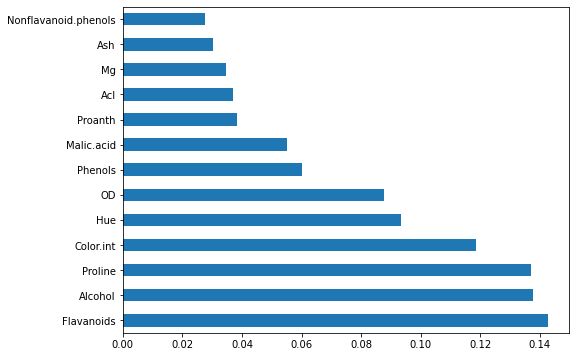

In [27]:
# Usando o ExtraTree  para nos mostrar as Variáveis mais Importantes
modelo = ExtraTreesClassifier()
modelo.fit(X,y)

plt.figure(figsize=(8,6))
melhores = pd.Series(modelo.feature_importances_,index=X.columns)
melhores.nlargest(24).plot(kind='barh')
plt.show()

In [28]:
#Função para ranquear as 6 mais importantes
melhores.nlargest(6).index

Index(['Flavanoids', 'Alcohol', 'Proline', 'Color.int', 'Hue', 'OD'], dtype='object')

In [29]:
# Separando as 6 variáveis mais importantes em "X" para que o algoritmo treine com esses dados
X = dataset[['Flavanoids', 'OD', 'Hue', 'Color.int', 'Phenols', 'Malic.acid']]
X.head()

,Flavanoids,OD,Hue,Color.int,Phenols,Malic.acid
0,3.06,3.92,1.04,5.64,2.80,1.71
1,2.76,3.40,1.05,4.38,2.65,1.78
2,3.24,3.17,1.03,5.68,2.80,2.36
3,3.49,3.45,0.86,7.80,3.85,1.95
4,2.69,2.93,1.04,4.32,2.80,2.59


# 4. Definindo o algoritmo de aprendizado

## 4.1. KNN

In [30]:
kf_knn = KFold(n_splits=10, shuffle=True)
classificador_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean', algorithm='brute')
pontuacao_knn = cross_val_score(classificador_knn, X, y, cv=kf_knn)

In [31]:
pontuacao_knn.mean(), pontuacao_knn.std()

(0.9264705882352942, 0.06678590515670575)

## 4.2. Árvores de Decisão

In [32]:
kf_tree = KFold(n_splits=10, shuffle=True)
classificador_tree = DecisionTreeClassifier(criterion='entropy')
pontuacao_tree = cross_val_score(classificador_tree, X, y, cv=kf_tree)

In [33]:
pontuacao_tree.mean(), pontuacao_tree.std()

(0.9333333333333333, 0.08534606386520675)